In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train['train_test'] = 0
test['train_test'] = 1
test['Response'] = np.NaN
all_data = pd.concat([train,test])

In [5]:
all_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0


In [6]:
all_data.Response.value_counts()

0.0    38673
1.0    12209
Name: Response, dtype: int64

In [7]:
11209/(12209+28673)

0.274179345433198

In [9]:
all_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN,1
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN,1
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN,1
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN,1


In [8]:
all_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
train_test                     0
dtype: int64

In [10]:
all_data.Holding_Policy_Type.value_counts()

3.0    18851
1.0    11747
2.0     7155
4.0     6080
Name: Holding_Policy_Type, dtype: int64

In [11]:
all_data.Holding_Policy_Duration = all_data.Holding_Policy_Duration.fillna(0)
all_data.Holding_Policy_Type = all_data.Holding_Policy_Type.fillna(0)

In [12]:
all_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
train_test                     0
dtype: int64

In [16]:
all_data['Health Indicator'].value_counts()

X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

In [17]:
all_data['Health Indicator'] = all_data['Health Indicator'].fillna('X10')

In [18]:
all_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
train_test                     0
dtype: int64

In [19]:
train_cleaned = all_data.loc[all_data['train_test']==0]
test_cleaned = all_data.loc[all_data['train_test']==1]

In [20]:
train_cleaned

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1.0,0


In [21]:
train_cleaned.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test
count,50882.000000,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,50882,50882.0,50882.000000,50882.000000,50882.000000,50882.000000,50882.0
unique,NaN,36,NaN,2,2,NaN,NaN,2,10,16.0,NaN,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,8973,NaN,27951,40536,NaN,NaN,42460,13010,20251.0,NaN,NaN,NaN,NaN,NaN
mean,25441.500000,NaN,1732.788707,NaN,NaN,44.856275,42.738866,NaN,NaN,NaN,1.468417,15.115188,14183.950069,0.239947,0.0
std,14688.512535,NaN,1424.081652,NaN,NaN,17.310271,17.319375,NaN,NaN,NaN,1.434988,6.340663,6590.074873,0.427055,0.0
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,0.000000,1.000000,2280.000000,0.000000,0.0
25%,12721.250000,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,0.000000,12.000000,9248.000000,0.000000,0.0
50%,25441.500000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,1.000000,17.000000,13178.000000,0.000000,0.0
75%,38161.750000,NaN,2667.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18096.000000,0.000000,0.0


In [22]:
res_1 = train_cleaned.loc[train_cleaned['Response']==1]
res_1

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1.0,0
9,10,C1,530,Owned,Joint,59,26,Yes,X10,7.0,4.0,18,21100.8,1.0,0
10,11,C28,600,Owned,Individual,21,21,No,X2,0,0.0,21,4068.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50858,50859,C1,494,Rented,Joint,62,29,Yes,X1,13.0,3.0,18,24323.2,1.0,0
50863,50864,C1,3705,Owned,Individual,75,75,No,X3,0,0.0,16,17850.0,1.0,0
50868,50869,C1,2327,Owned,Individual,75,75,No,X3,9.0,3.0,18,22066.0,1.0,0
50875,50876,C6,231,Rented,Individual,36,36,No,X3,2.0,1.0,20,13574.0,1.0,0


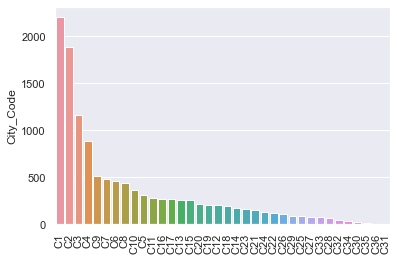

In [24]:
loc = res_1['City_Code'].value_counts()
chart = sns.barplot(x=loc.index,y=loc)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

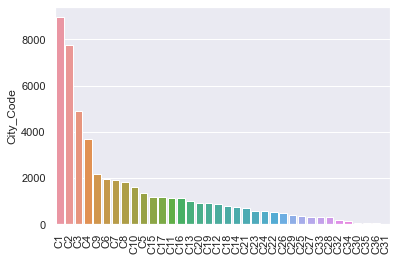

In [28]:
loc1 = train_cleaned['City_Code'].value_counts()
chart = sns.barplot(x=loc1.index,y=loc1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [31]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
train_cleaned['City_Code_Encoded'] = encoder.fit_transform(train_cleaned['City_Code'], train_cleaned['Response'])


In [43]:
train_cleaned

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test,City_Code_Endoded,City_Code_Encoded
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,0,0.237472,0.237472
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0.0,0,0.230205,0.230205
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1.0,0,0.230205,0.230205
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,0,0.235081,0.235081
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0.241971,0.241971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0.0,0,0.242168,0.242168
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0.0,0,0.230205,0.230205
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0.0,0,0.246072,0.246072
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1.0,0,0.246072,0.246072


In [44]:
train_cleaned['City_Code'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [45]:
train_cleaned['City_Code_Encoded'].unique()

array([0.23747188, 0.23020528, 0.23508137, 0.24197121, 0.23340961,
       0.24607155, 0.21332209, 0.23508772, 0.25762712, 0.25340314,
       0.22894168, 0.24043716, 0.24216835, 0.24435265, 0.27692308,
       0.22594662, 0.22864538, 0.23839398, 0.23700441, 0.23514212,
       0.24825175, 0.21643287, 0.23136819, 0.23589744, 0.2281106 ,
       0.25373134, 0.24324324, 0.23592493, 0.23062016, 0.26575809,
       0.22827688, 0.13888889, 0.2875    , 0.31034483, 0.28571429,
       0.13333342])

In [47]:
test_cleaned['City_Code_Encoded'] = test['City_Code']
test_cleaned['City_Code_Encoded'] = test_cleaned['City_Code_Encoded'].replace(['C3', 'C5', 'C24', 'C8', 'C9', 
                                                                               'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'],[0.23747188, 0.23020528, 0.23508137, 0.24197121, 0.23340961,
       0.24607155, 0.21332209, 0.23508772, 0.25762712, 0.25340314,
       0.22894168, 0.24043716, 0.24216835, 0.24435265, 0.27692308,
       0.22594662, 0.22864538, 0.23839398, 0.23700441, 0.23514212,
       0.24825175, 0.21643287, 0.23136819, 0.23589744, 0.2281106 ,
       0.25373134, 0.24324324, 0.23592493, 0.23062016, 0.26575809,
       0.22827688, 0.13888889, 0.2875    , 0.31034483, 0.28571429,
       0.13333342])


In [48]:
test_cleaned

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test,City_Code_Encoded
0,50883,C1,156,Owned,Individual,30,30,No,X10,6.0,3.0,5,11934.0,NaN,1,0.246072
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,NaN,1,0.242168
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,NaN,1,0.246072
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,NaN,1,0.237472
4,50887,C1,951,Owned,Individual,75,75,No,X3,0,0.0,5,22534.0,NaN,1,0.246072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN,1,0.237472
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN,1,0.242168
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,0,0.0,1,17836.0,NaN,1,0.228111
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN,1,0.225947


In [49]:
train_cleaned.Region_Code.unique().shape

(5316,)

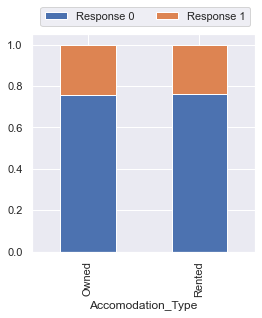

In [50]:
acc=pd.pivot_table(train_cleaned,index=['Accomodation_Type'],columns=['Response'],values=['ID'],aggfunc='count')
acc.div(acc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

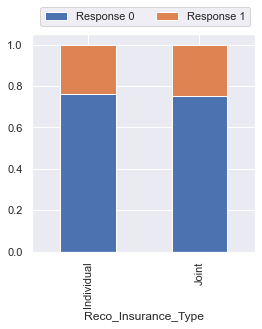

In [51]:
reco=pd.pivot_table(train_cleaned,index=['Reco_Insurance_Type'],columns=['Response'],values=['ID'],aggfunc='count')
reco.div(reco.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

<AxesSubplot:xlabel='Upper_Age', ylabel='Density'>

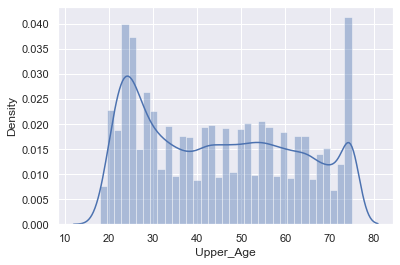

In [52]:
sns.distplot(train_cleaned['Upper_Age'])

<AxesSubplot:xlabel='Lower_Age', ylabel='Density'>

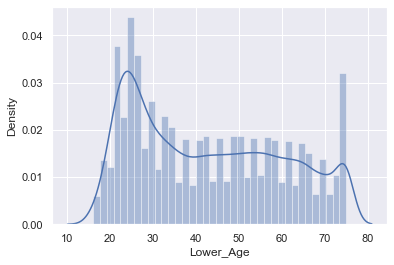

In [53]:
sns.distplot(train_cleaned['Lower_Age'])

In [54]:
train_cleaned['Age'] = (train_cleaned['Upper_Age']+train_cleaned['Lower_Age'])//2

<AxesSubplot:xlabel='Age', ylabel='Density'>

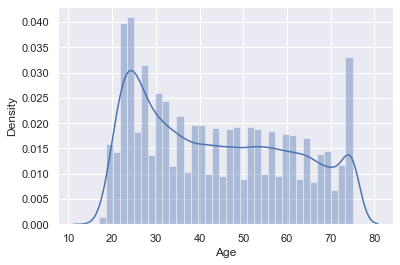

In [55]:
sns.distplot(train_cleaned['Age'])

In [56]:
d = train_cleaned.loc[train_cleaned['Reco_Insurance_Type']=='Joint']
d

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test,City_Code_Endoded,City_Code_Encoded,Age
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0.0,0,0.230205,0.230205,48
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,0,0.235081,0.235081,50
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1.0,0,0.246072,0.246072,74
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0.0,0,0.213322,0.213322,47
9,10,C1,530,Owned,Joint,59,26,Yes,X10,7.0,4.0,18,21100.8,1.0,0,0.246072,0.246072,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50834,50835,C2,204,Owned,Joint,75,64,Yes,X1,1.0,1.0,3,33796.0,0.0,0,0.244353,0.244353,69
50850,50851,C2,237,Owned,Joint,66,26,No,X1,0,0.0,22,30273.6,0.0,0,0.244353,0.244353,46
50855,50856,C1,1399,Owned,Joint,70,58,Yes,X1,2.0,1.0,19,25746.0,0.0,0,0.246072,0.246072,64
50858,50859,C1,494,Rented,Joint,62,29,Yes,X1,13.0,3.0,18,24323.2,1.0,0,0.246072,0.246072,45


<AxesSubplot:xlabel='Response', ylabel='count'>

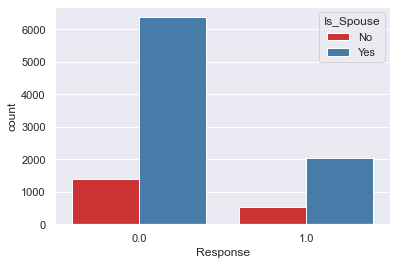

In [57]:
sns.countplot( x='Response', data=d, hue="Is_Spouse", palette="Set1")

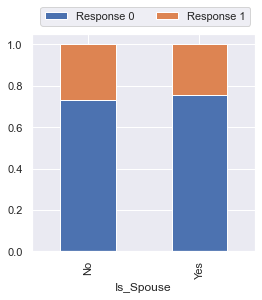

In [60]:
sp=pd.pivot_table(d,index=['Is_Spouse'],columns=['Response'],values=['ID'],aggfunc='count')
sp.div(sp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()



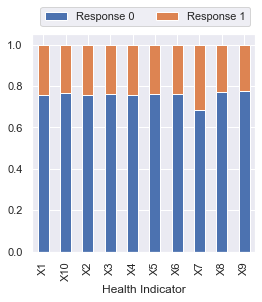

In [58]:
health=pd.pivot_table(train_cleaned,index=['Health Indicator'],columns=['Response'],values=['ID'],aggfunc='count')
health.div(health.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()



In [61]:
train_cleaned['Holding_Policy_Duration'] = train_cleaned['Holding_Policy_Duration'].replace({'14+':15})
test_cleaned['Holding_Policy_Duration'] = test_cleaned['Holding_Policy_Duration'].replace({'14+':15})


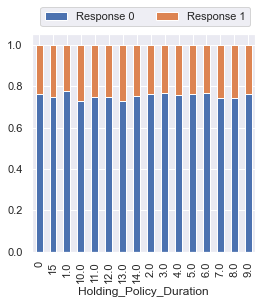

In [63]:
dur=pd.pivot_table(train_cleaned,index=['Holding_Policy_Duration'],columns=['Response'],values=['ID'],aggfunc='count')
dur.div(dur.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

In [64]:
train_cleaned

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_test,City_Code_Endoded,City_Code_Encoded,Age
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0.0,0,0.237472,0.237472,36
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0.0,0,0.230205,0.230205,48
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1.0,0,0.230205,0.230205,32
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0.0,0,0.235081,0.235081,50
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0.241971,0.241971,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0.0,0,0.242168,0.242168,22
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0.0,0,0.230205,0.230205,27
50879,50880,C1,442,Rented,Individual,63,63,No,X2,15,1.0,12,11374.0,0.0,0,0.246072,0.246072,63
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1.0,0,0.246072,0.246072,60


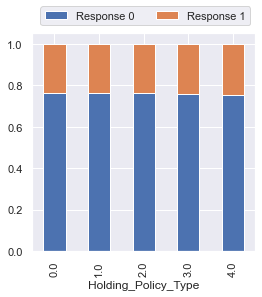

In [65]:
htype=pd.pivot_table(train_cleaned,index=['Holding_Policy_Type'],columns=['Response'],values=['ID'],aggfunc='count')
htype.div(htype.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

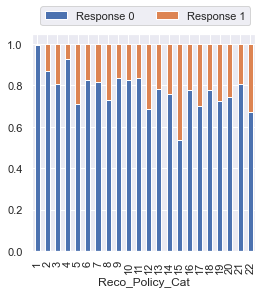

In [66]:
cat=pd.pivot_table(train_cleaned,index=['Reco_Policy_Cat'],columns=['Response'],values=['ID'],aggfunc='count')
cat.div(cat.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

<AxesSubplot:xlabel='Reco_Policy_Premium', ylabel='Density'>

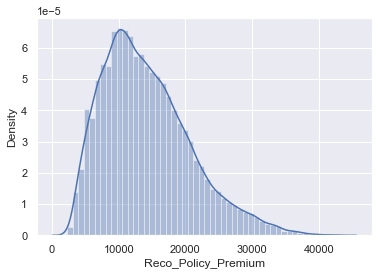

In [67]:
sns.distplot(train_cleaned['Reco_Policy_Premium'])

In [68]:
train_cleaned['Reco_Policy_Premium'].min()

2280.0

In [69]:
train_cleaned['Reco_Policy_Premium'].max()

43350.4

In [70]:
train_cleaned['Reco_Policy_Premium'].mean()

14183.950068786546

In [71]:
train_cleaned.loc[train_cleaned['Reco_Policy_Premium']<10000,'Premium_Type'] = 'Low'
train_cleaned.loc[(train_cleaned['Reco_Policy_Premium']>=10000)&(train_cleaned['Reco_Policy_Premium']<20000),'Premium_Type'] = 'Medium'
train_cleaned.loc[train_cleaned['Reco_Policy_Premium']>=20000,'Premium_Type'] = 'High'

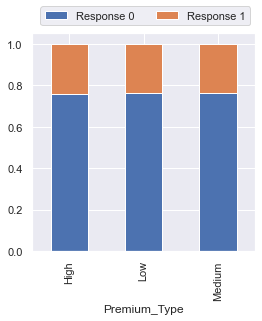

In [72]:
pre=pd.pivot_table(train_cleaned,index=['Premium_Type'],columns=['Response'],values=['ID'],aggfunc='count')
pre.div(pre.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

In [78]:
train_cleaned = train_cleaned.drop(['ID','City_Code','Region_Code','Is_Spouse','train_test','Age'],1)

In [79]:
test_cleaned = test_cleaned.drop(['train_test','Response','ID'],1)

In [80]:
train_cleaned

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Encoded,Premium_Type
0,Rented,Individual,36,36,X1,15,3.0,22,11628.0,0.0,0.237472,Medium
1,Owned,Joint,75,22,X2,0,0.0,22,30510.0,0.0,0.230205,High
2,Owned,Individual,32,32,X10,1.0,1.0,19,7450.0,1.0,0.230205,Low
3,Owned,Joint,52,48,X1,15,3.0,19,17780.0,0.0,0.235081,Medium
4,Rented,Individual,44,44,X2,3.0,1.0,16,10404.0,0.0,0.241971,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,Rented,Individual,22,22,X3,0,0.0,18,7704.0,0.0,0.242168,Low
50878,Rented,Individual,27,27,X3,7.0,3.0,4,5408.0,0.0,0.230205,Low
50879,Rented,Individual,63,63,X2,15,1.0,12,11374.0,0.0,0.246072,Medium
50880,Owned,Joint,71,49,X2,2.0,2.0,16,28179.2,1.0,0.246072,High


In [83]:
test_cleaned = test_cleaned.drop(['City_Code','Region_Code','Is_Spouse'],1)

In [84]:
test_cleaned

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Encoded
0,Owned,Individual,30,30,X10,6.0,3.0,5,11934.0,0.246072
1,Owned,Joint,69,68,X1,3.0,3.0,18,32204.8,0.242168
2,Rented,Individual,28,28,X3,2.0,4.0,17,9240.0,0.246072
3,Rented,Individual,23,23,X3,3.0,3.0,18,9086.0,0.237472
4,Owned,Individual,75,75,X3,0,0.0,5,22534.0,0.246072
...,...,...,...,...,...,...,...,...,...,...
21800,Owned,Individual,45,45,X1,4.0,1.0,18,15884.0,0.237472
21801,Owned,Individual,59,59,X5,6.0,3.0,18,21390.0,0.242168
21802,Owned,Individual,74,74,X3,0,0.0,1,17836.0,0.228111
21803,Rented,Individual,25,25,X4,3.0,1.0,19,11568.0,0.225947


In [85]:
X = train_cleaned.drop(['Premium_Type','Response'],1)
y = train_cleaned.Response

In [86]:
X = pd.get_dummies(X)


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled= sc.fit_transform(X_test)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
pred = model.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.7602358336062889

In [104]:
test_dummy = pd.get_dummies(test_cleaned)
test1= sc.fit_transform(test_dummy)
test_pred = model.predict(test1)

In [105]:
test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [98]:
test_pred = test_pred.astype('int32')

In [101]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_logistic1.csv',index=False)

In [109]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
                                       
random_forest.fit(X_train_scaled, y_train)
pred = random_forest.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.7494267933180478

In [110]:
test_pred = random_forest.predict(test1)

In [111]:
test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
test_pred = test_pred.astype('int32')

In [113]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_rf1.csv',index=False)

In [178]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1.0))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0.0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 8549
Before OverSampling, counts of label '0': 27068 

After OverSampling, the shape of train_X: (54136, 36)
After OverSampling, the shape of train_y: (54136,) 

After OverSampling, counts of label '1': 27068
After OverSampling, counts of label '0': 27068


In [179]:
X_train_res

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Encoded,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,...,Holding_Policy_Duration_13.0,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
0,68,68,2.000000,1,19312.000000,0.228645,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,23,23,0.000000,4,3798.000000,0.233410,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,52,52,4.000000,4,10242.000000,0.233410,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,27,27,0.000000,18,10688.000000,0.265758,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,25,25,0.000000,16,10624.000000,0.228645,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54131,37,37,2.737883,17,12560.000000,0.241641,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
54132,31,31,3.000000,5,6051.481364,0.234707,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
54133,67,63,1.227999,19,28131.780270,0.246072,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54134,36,28,2.000000,17,16138.808267,0.243816,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [188]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

In [189]:
predictions


array([0., 0., 1., ..., 0., 0., 1.])

In [190]:
accuracy_score(y_test,predictions)

0.6349164755977726

In [191]:
pd.DataFrame(predictions).value_counts()

0.0    11022
1.0     4243
dtype: int64

In [192]:
test_pred = lr1.predict(test1)
test_pred

array([1., 1., 0., ..., 0., 1., 1.])

In [194]:
test_pred = test_pred.astype('int32')

In [195]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_lr_unscaled.csv',index=False)

In [196]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train_res, y_train_res.ravel())

DecisionTreeClassifier(random_state=0)

In [198]:
pred = decision_tree.predict(X_test)
pred

array([0., 0., 0., ..., 0., 1., 1.])

In [199]:
accuracy_score(y_test,pred)

0.6424500491320013

In [200]:
test_pred = decision_tree.predict(test1)
test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [201]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_dt_unscaled.csv',index=False)

In [129]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [131]:
!pip install graphviz


In [140]:
from sklearn import tree
decision_tree = tree.export_graphviz(decision_tree,out_file='tree.dot',feature_names=X_train.columns,max_depth=2,filled=True)

TypeError: None is not an estimator instance.

In [169]:
!dot -Tpng tree.dot -o tree.png

In [142]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [143]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [147]:
train_new = train.dropna(subset = ['Health Indicator'])

In [148]:
train_new

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [149]:
train_new.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    15643
Holding_Policy_Type        15643
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

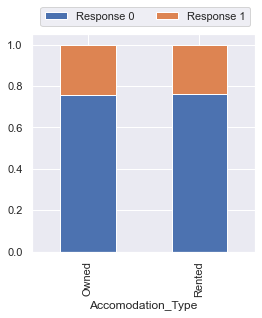

In [150]:
acc=pd.pivot_table(train,index=['Accomodation_Type'],columns=['Response'],values=['ID'],aggfunc='count')
acc.div(acc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Response 0", "Response 1"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

In [151]:
train.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [152]:
train_new.Response.value_counts()

0    29720
1     9471
Name: Response, dtype: int64

In [153]:
9471/(9471+29720)

0.24166262662345947

In [154]:
12209/(12209+38673)

0.2399473291144216

In [155]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


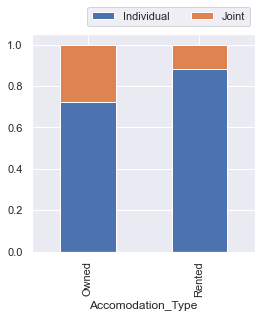

In [157]:
acc=pd.pivot_table(train,index=['Accomodation_Type'],columns=['Reco_Insurance_Type'],values=['ID'],aggfunc='count')
acc.div(acc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Individual", "Joint"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

In [158]:
train_copy = train.copy()

In [167]:
#train_copy['Acc_Itype'] = np.NaN
train_copy.loc[(train_copy['Accomodation_Type']=='Rented') & 
                        (train_copy['Reco_Insurance_Type']=='Individual'),'Acc_Itype'] = 'Rented_Individual'

train_copy.loc[(train_copy['Accomodation_Type']=='Rented') & 
                        (train_copy['Reco_Insurance_Type']=='Joint'),'Acc_Itype'] = 'Rented_Joint'

train_copy.loc[(train_copy['Accomodation_Type']=='Owned') & 
                        (train_copy['Reco_Insurance_Type']=='Individual'),'Acc_Itype'] = 'Owned_Individual'

train_copy.loc[(train_copy['Accomodation_Type']=='Owned') & 
                        (train_copy['Reco_Insurance_Type']=='Joint'),'Acc_Itype'] = 'Owned_Joint'


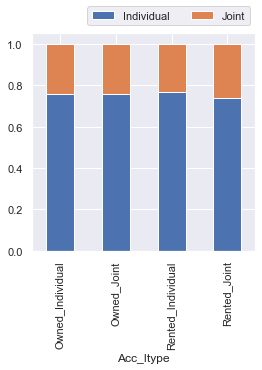

In [168]:
acc=pd.pivot_table(train_copy,index=['Acc_Itype'],columns=['Response'],values=['ID'],aggfunc='count')
acc.div(acc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Individual", "Joint"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

In [166]:
train_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Acc_Itype
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,Rented_Joint
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,Rented_Joint
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,Rented_Joint
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,Rented_Joint
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,Rented_Joint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0,Rented_Joint
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,Rented_Joint
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0,Rented_Joint
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,Rented_Joint


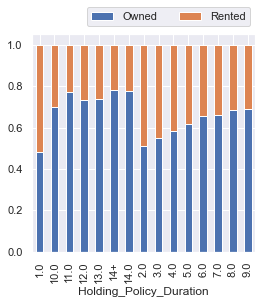

In [172]:
acc=pd.pivot_table(train,index=['Holding_Policy_Duration'],columns=['Accomodation_Type'],values=['ID'],aggfunc='count')
acc.div(acc.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(["Owned", "Rented"],bbox_to_anchor =(1.00, 1.15), ncol = 2) 
plt.show()

In [173]:
train.Holding_Policy_Type.value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [175]:
train.Upper_Age.min()

18

In [176]:
train.Lower_Age.max()

75

In [ ]:
# Dummy for city code
# target encoder for region code
# Only upper age
# Seperate ctogory for missing values
# pd.dummy not taking all dummy variables
# 

In [202]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [203]:
X.columns

Index(['Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'City_Code_Encoded', 'Accomodation_Type_Owned',
       'Accomodation_Type_Rented', 'Reco_Insurance_Type_Individual',
       'Reco_Insurance_Type_Joint', 'Health Indicator_X1',
       'Health Indicator_X10', 'Health Indicator_X2', 'Health Indicator_X3',
       'Health Indicator_X4', 'Health Indicator_X5', 'Health Indicator_X6',
       'Health Indicator_X7', 'Health Indicator_X8', 'Health Indicator_X9',
       'Holding_Policy_Duration_0', 'Holding_Policy_Duration_15',
       'Holding_Policy_Duration_1.0', 'Holding_Policy_Duration_10.0',
       'Holding_Policy_Duration_11.0', 'Holding_Policy_Duration_12.0',
       'Holding_Policy_Duration_13.0', 'Holding_Policy_Duration_14.0',
       'Holding_Policy_Duration_2.0', 'Holding_Policy_Duration_3.0',
       'Holding_Policy_Duration_4.0', 'Holding_Policy_Duration_5.0',
       'Holding_Policy_Duration_6.0', 'Holding_Policy_Duration_7.0',
     

<AxesSubplot:xlabel='Upper_Age', ylabel='Density'>

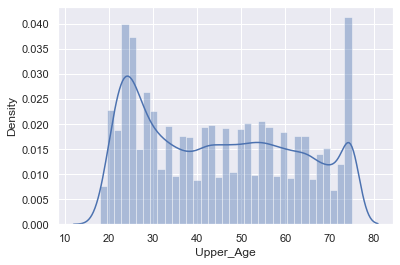

In [204]:
sns.distplot(train['Upper_Age'])

In [205]:
test

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [206]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [212]:
a = train[train['Response']==1].City_Code.value_counts()

In [213]:
b = train.City_Code.value_counts()

In [214]:
a/b

C1     0.246072
C10    0.225947
C11    0.243243
C12    0.228111
C13    0.253731
C14    0.235925
C15    0.213322
C16    0.237004
C17    0.228645
C18    0.238394
C19    0.231368
C2     0.244353
C20    0.228942
C21    0.228277
C22    0.230620
C23    0.265758
C24    0.235081
C25    0.240437
C26    0.216433
C27    0.257627
C28    0.235088
C29    0.235142
C3     0.237472
C30    0.310345
C31    0.133333
C32    0.287500
C33    0.248252
C34    0.276923
C35    0.285714
C36    0.138889
C4     0.242168
C5     0.230205
C6     0.235897
C7     0.253403
C8     0.241971
C9     0.233410
Name: City_Code, dtype: float64

<AxesSubplot:xlabel='City_Code', ylabel='Density'>

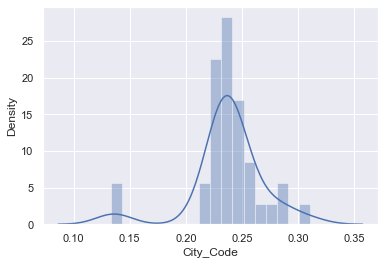

In [215]:
sns.distplot(a/b)

In [218]:
c = a/b.values

In [219]:
type(c)

pandas.core.series.Series

In [220]:
city = train.City_Code

In [223]:
d  = city.replace(c)

In [224]:
d.shape

(50882,)

In [225]:
d

0        0.237472
1        0.230205
2        0.230205
3        0.235081
4        0.241971
           ...   
50877    0.242168
50878    0.230205
50879    0.246072
50880    0.246072
50881    0.237472
Name: City_Code, Length: 50882, dtype: float64

In [226]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [230]:
r1 = train.Reco_Policy_Cat.value_counts()

In [229]:
r2 = train[train['Response']==1].Reco_Policy_Cat.value_counts()

In [231]:
r2/r1

1     0.004067
2     0.132499
3     0.193579
4     0.073892
5     0.290963
6     0.172738
7     0.185851
8     0.269330
9     0.166033
10    0.176623
11    0.166453
12    0.315037
13    0.218527
14    0.243972
15    0.465635
16    0.223555
17    0.298456
18    0.220601
19    0.276969
20    0.254958
21    0.193754
22    0.328385
Name: Reco_Policy_Cat, dtype: float64

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Density'>

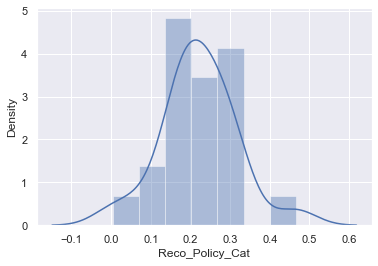

In [232]:
sns.distplot(r2/r1)

In [233]:
train_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Acc_Itype
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,Rented_Individual
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,Owned_Joint
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,Owned_Individual
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,Owned_Joint
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,Rented_Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0,Rented_Individual
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,Rented_Individual
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0,Rented_Individual
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,Owned_Joint


In [234]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
                                       
random_forest.fit(X_train_res, y_train_res.ravel()) 
pred = random_forest.predict(X_test)
accuracy_score(y_test,pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [235]:
X

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,City_Code_Encoded,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,...,Holding_Policy_Duration_13.0,Holding_Policy_Duration_14.0,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Holding_Policy_Duration_5.0,Holding_Policy_Duration_6.0,Holding_Policy_Duration_7.0,Holding_Policy_Duration_8.0,Holding_Policy_Duration_9.0
0,36,36,3.0,22,11628.0,0.237472,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,75,22,0.0,22,30510.0,0.230205,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,32,32,1.0,19,7450.0,0.230205,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,52,48,3.0,19,17780.0,0.235081,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,44,44,1.0,16,10404.0,0.241971,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,22,22,0.0,18,7704.0,0.242168,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
50878,27,27,3.0,4,5408.0,0.230205,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
50879,63,63,1.0,12,11374.0,0.246072,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
50880,71,49,2.0,16,28179.2,0.246072,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [238]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
clf = XGBClassifier()
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
roc_auc_score(y_test, pred, average=None)

0.516602686801195

In [240]:
test_pred = clf.predict_proba(test1)[:,1]

<AxesSubplot:ylabel='Density'>

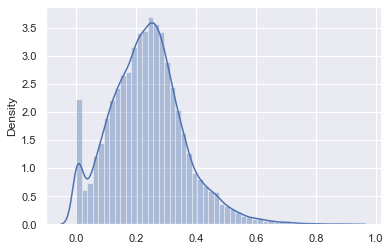

In [241]:
sns.distplot(test_pred)

In [242]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_lgbm2.csv',index=False)

In [243]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
roc_auc_score(y_test, pred, average=None)

0.5036696308120441

In [244]:
test_pred = clf.predict_proba(test1)[:,1]

<AxesSubplot:ylabel='Density'>

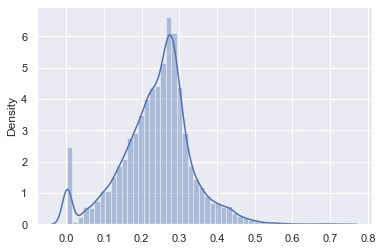

In [246]:
sns.distplot(test_pred)

In [247]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_lgbm_new.csv',index=False)